AutoEncoders lab - 22/05/2023

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

2023-05-27 19:45:39.102265: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 19:45:39.231303: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-27 19:45:39.232154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 19:45:40.080937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [4]:
# Normalize the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

In [5]:
# Define the Autoenc Model
input_img = keras.Input(shape=(28, 28, 1))
encoded=layers.Flatten()(input_img)


In [6]:
encoded = layers.Dense(64, activation='relu')(encoded)

2023-05-27 19:48:03.602486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [8]:
decoded = layers.Reshape((28, 28, 1))(decoded)

In [9]:
autoencoder = keras.Model(input_img, decoded)

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.utils import plot_model

In [15]:
# Training the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 0.1404 - val_loss: 0.0951
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0854 - val_loss: 0.0804
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0779 - val_loss: 0.0771
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0758 - val_loss: 0.0757
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0749 - val_loss: 0.0753
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0745 - val_loss: 0.0749
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0742 - val_loss: 0.0747
Epoch 8/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0740 - val_loss: 0.0745
Epoch 9/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0739 - val_loss: 0.0748
Epoch 10/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.073

In [16]:
# Testing the model
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [17]:
# Displaying the results
import matplotlib.pyplot as plt

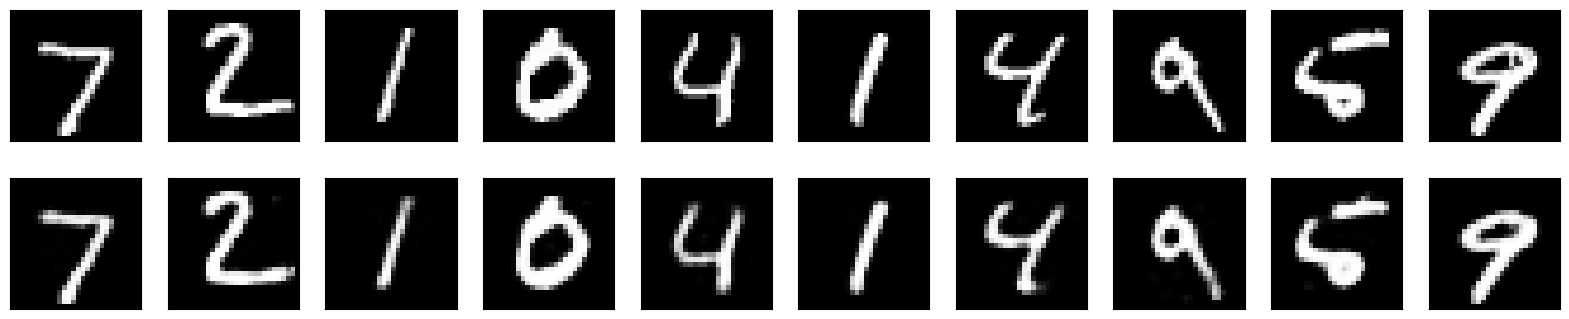

In [20]:
n = 10 # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()